Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [50]:
NAME = "Quanpu Xiao"
STUDENT_ID = "14368978"

---

# Social Network Analysis Assignment

This assignment aims to familiarize you with the concepts and practical applications of social network analysis. You will be working with Python and the NetworkX library to create, analyze, and understand various types of networks.


---

## Task 1: Create a Small Network

**Objective:** Generate a network with 10 nodes and a density of 0.2 using NetworkX.

**Instructions:**
1. Calculate the number of edges `m` needed to achieve a density `d = 0.2` for a network of `n = 10` nodes using the formula:

$$d = \frac{2m}{n(n-1)}$$


2. Create a graph in NetworkX in variable `G` and add the calculated number of edges.
3. Ensure the network consists of one large component.

In [51]:
import networkx as nx

C:\Users\kalei\AppData\Local\Temp\ipykernel_23404\2357078061.py:16: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v = random.sample(G.nodes(), 2)


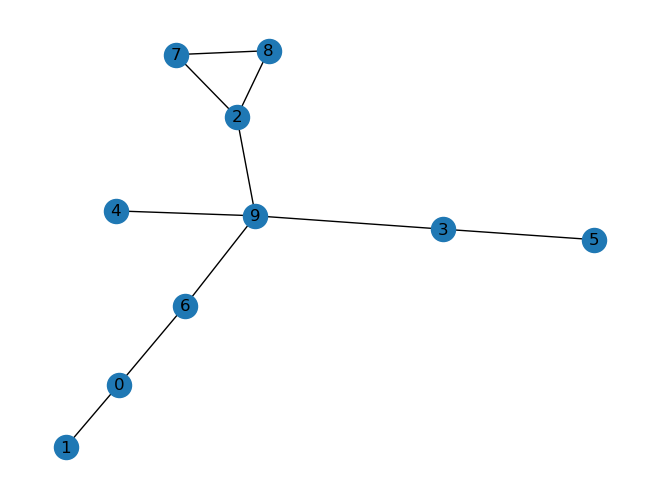

In [52]:

G = ...

# YOUR CODE HERE
import random
n = 10  # Nodes
d = 0.2  # Density

m = int(d * n * (n - 1) / 2)

G = nx.Graph()
# Adding nodes
G.add_nodes_from(range(n))

# Adding edges randomly until desired number of edges
while G.number_of_edges() < m:
    u, v = random.sample(G.nodes(), 2)
    if not G.has_edge(u, v):
        G.add_edge(u, v)

# Ensure the network consists of one large component
while nx.number_connected_components(G) > 1:
    components = list(nx.connected_components(G))
    u = random.choice(list(components[0]))
    v = random.choice(list(components[1]))
    G.add_edge(u, v)
    
import matplotlib.pyplot as plt

plt.figure
nx.draw(G, with_labels=True)
plt.show()

In [53]:
assert type(G) == nx.Graph

## Task 2: Create a Non-Small-World Network

**Objective:** Write a script to generate a network that is not a small world. The network should have 500 nodes and at least 1000 edges, with an average shortest path length of at least 50.

**Instructions:**
1. Create a function `create_large_world_network` that generates a network according to the specified criteria.
2. Ensure that the network is not a small world by design.

Nodes: 500; edges: 1099; average shortest path: 67.39679358717434
Average clustering coefficient: 0.8416000000000026


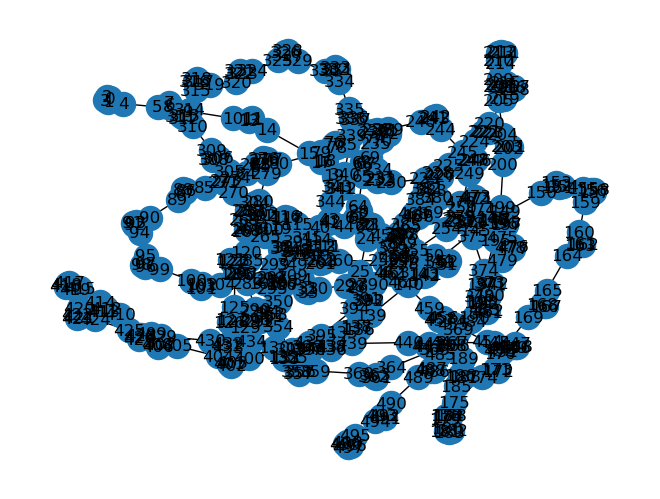

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

def create_large_world_network():
    # YOUR CODE HERE
    G = nx.Graph()
    num_nodes = 500
    num_edges = 1000
    cluster_size = 5  # Size of each cluster, effects ASP (currently only works for 5 under this task requirements)
    num_clusters = num_nodes // cluster_size

    # Create clusters
    for i in range(num_clusters):
        start = i * cluster_size
        end = start + cluster_size
        for j in range(start, end):
            for k in range(j + 1, end):
                G.add_edge(j, k)

    # Connect the clusters
    for i in range(num_clusters - 1):
        G.add_edge(i * cluster_size + (cluster_size - 1), (i + 1) * cluster_size)
        
    '''
    # Add remaining edges
    while G.number_of_edges() < num_edges:
        print(f"Edges: {G.number_of_edges()}; ASP: {nx.average_shortest_path_length(G)}; ACC: {nx.average_clustering(G)}")
        a, b = random.sample(range(num_nodes), 2)
        if not G.has_edge(a, b):
            G.add_edge(a, b)
            if nx.average_shortest_path_length(G) >= 50 and nx.average_clustering(G) <= 0.1:
                continue
            else:
                G.remove_edge(a, b)
    '''
            
    return G

G = create_large_world_network()

print(f"Nodes: {len(G.nodes())}; edges: {len(G.edges())}; average shortest path: {nx.average_shortest_path_length(G)}")

clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient: {clustering_coefficient}")

plt.figure
nx.draw(G, with_labels=True)
plt.show()

# Note: ASP in high enouth, however ACC is too high for this network to be considered as a large world network imo

## Task 3: Analyze the Florentine Families Network

**Objective:** Analyze the Florentine families network to find the most central node in terms of PageRank, betweenness, degree, and eigenvector centrality.

**Instructions:**
1. Load the Florentine families dataset (Padget & Ansell, 1993).
2. Calculate and return the most central node for each centrality measure (PageRank, Betweenness, Degree, and Eigenvector centrality)

Node with highest PageRank centrality: 4
Node with highest Betweenness centrality: 249
Node with highest Degree centrality: 4
Node with highest Eigenvector centrality: 5


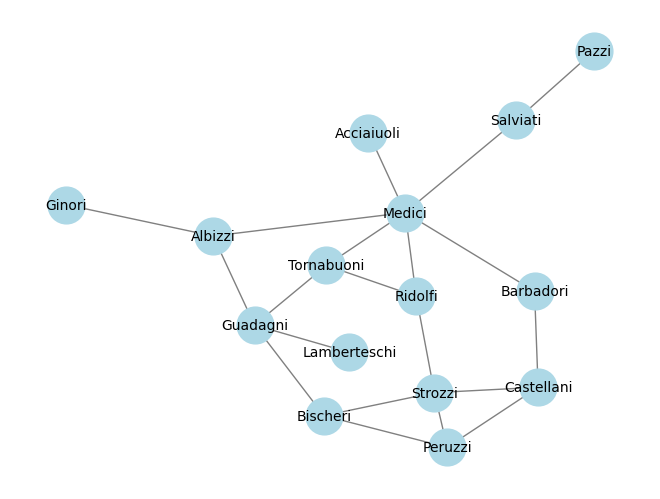

In [55]:
import matplotlib.pyplot as plt


def find_most_central_nodes(G):
    # YOUR CODE HERE
    # PageRank centrality
    pagerank = nx.pagerank(G)
    top_pagerank = max(pagerank, key=pagerank.get)

    # Betweenness centrality
    betweenness = nx.betweenness_centrality(G)
    top_betweenness = max(betweenness, key=betweenness.get)

    # Degree centrality
    degree = nx.degree_centrality(G)
    top_degree = max(degree, key=degree.get)

    # Eigenvector centrality
    eigenvector = nx.eigenvector_centrality(G, max_iter=500, tol=1e-2)
    top_eigenvector = max(eigenvector, key=eigenvector.get)

    return top_pagerank, top_betweenness, top_degree, top_eigenvector

top_pagerank, top_betweenness, top_degree, top_eigenvector = find_most_central_nodes(G)

G = nx.florentine_families_graph()

print(f"Node with highest PageRank centrality: {top_pagerank}")
print(f"Node with highest Betweenness centrality: {top_betweenness}")
print(f"Node with highest Degree centrality: {top_degree}")
print(f"Node with highest Eigenvector centrality: {top_eigenvector}")

# Visualize the network
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, node_size=700)
plt.show()

---

## Task 4: Generate a Graph with Clustered Communities

**Objective:** Write a function to generate a graph with N clusters, each containing M nodes. The nodes in each cluster should be randomly connected with density D - with connections going between randomly selected nodes. The clusters should be linked with each other, to produce a single component, with as few connections as possible.

**Instructions:**
1. Create a function `create_clustered_graph` that generates a graph according to the description above.
2. Analyze the graph using Louvain community detection to examine the resulting modularity.

Now generate two networks with your algorithm. One with 3 clusters, and one with 10 clusters. The other parameters should be same as above.

Run Louvain community detection on both. Which of the networks has a higher modularity? What do you make of this?

Modularity for the network with 3 clusters: 0.6596960021367262
Modularity for the network with 10 clusters: 0.8906147892584493
The identified modularity is 0.7958067982542886.


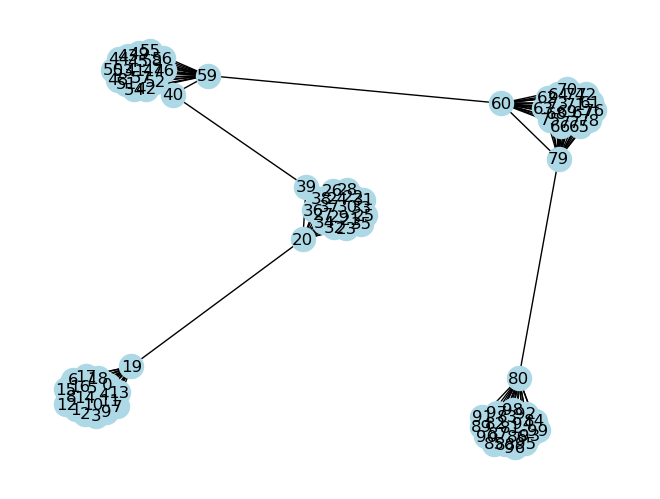

In [56]:
from community import community_louvain

def create_clustered_graph(N, M, D):
    G = nx.Graph()

    # YOUR CODE HERE
    for i in range(N):
        # Add nodes
        nodes = range(i * M, (i + 1) * M)
        G.add_nodes_from(nodes)

        # Randomly connect nodes with density D
        possible_edges = [(u, v) for u in nodes for v in nodes if u < v]
        num_edges = int(D * len(possible_edges))
        edges = random.sample(possible_edges, num_edges)
        G.add_edges_from(edges)

    # Connect clusters
    for i in range(N - 1):
        G.add_edge(i * M + (M - 1), (i + 1) * M)

    return G

def identify_louvain_modularity(G):
    #Use Louvain to identify communities in the graph, and print out the 
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)
    return modularity

# YOUR CODE HERE
# Network with 3 clusters
G1 = create_clustered_graph(3, 20, 0.5)
modularity1 = identify_louvain_modularity(G1)
print(f"Modularity for the network with 3 clusters: {modularity1}")

# Network with 10 clusters
G2 = create_clustered_graph(10, 20, 0.5)
modularity2 = identify_louvain_modularity(G2)
print(f"Modularity for the network with 10 clusters: {modularity2}")

num_clusters = 5
nodes_per_cluster = 20
intra_density = 1
G = create_clustered_graph(num_clusters, nodes_per_cluster, intra_density)

modularity = identify_louvain_modularity(G)
print(f"The identified modularity is {modularity}.")

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue')



---

## Task 5: Twitter Retweet Network Analysis

**Objective:** Create a network from a Twitter dataset and analyze it to find the most central politicians and calculate the weighted homophily based on party.

**Instructions:**
1. Load the Twitter dataset, sweden_2018.df.pickle, and create a network where nodes represent politicians and edges represent retweets.
2. Calculate the weighted homophily of the network. The weighted homophily is here the tendency for individuals of the same party to form connections with one another. 
3. Identify the most central politicians using different centrality measures.

In [57]:
import pandas as pd
import re

df = pd.read_pickle('sweden_2018.df.pickle')
display(df.head())

def extract_retweeted_username(tweet):

    pattern = r'RT @(\w+):'
    match = re.search(pattern, tweet)
    if match:
        return match.group(1)  # Returns the captured username
    return None  # Returns None if no match is found

#1. Extract retweets
#2. Include only retweets of politicians that have also sent at least one message. 
#3. Count the number of messages from each user to each user
#4. Create a weighted network from the resulting dataframe. The nodes should have include the party name as an attribute.

# YOUR CODE HERE
def create_twitter_network(df):
    G = nx.DiGraph()

    # Extract retweets and build the network
    for _, row in df.iterrows():
        retweeted_username = extract_retweeted_username(row['text'])
        if retweeted_username and retweeted_username in df['username'].values:
            if G.has_edge(row['username'], retweeted_username):
                G[row['username']][retweeted_username]['weight'] += 1
            else:
                G.add_edge(row['username'], retweeted_username, weight=1)
            G.nodes[row['username']]['party'] = row['party']
            G.nodes[retweeted_username]['party'] = df[df['username'] == retweeted_username]['party'].iloc[0]

    return G

G = create_twitter_network(df)

nx.draw(G)

def calculate_weighted_homophily(graph, attribute):
    # We now want to know the homophily of the network; that is, how much likelier nodes are to connect with nodes of the same party.
    # The weighted homophily is defined as the sum of edge weights that go between nodes with the same attributes, divided by the total edge weight.
    # Unfortunately, there is no built-in function for weighted homophily in networkx, so you have to write your own function!

    # YOUR CODE HERE
    same_attr_weight = 0
    total_weight = 0

    for u, v, data in G.edges(data=True):
        if G.nodes[u][attribute] == G.nodes[v][attribute]:
            same_attr_weight += data['weight']
        total_weight += data['weight']

    homophily_ratio = same_attr_weight / total_weight if total_weight else 0
    
    return homophily_ratio

homophily = calculate_weighted_homophily(G, 'party')

print(f"The resulting homophily is {homophily}.")

def find_most_central_nodes(G):
    # YOUR CODE HERE
    pagerank = nx.pagerank(G)
    betweenness = nx.betweenness_centrality(G)
    degree = nx.degree_centrality(G)
    eigenvector = nx.eigenvector_centrality_numpy(G)

    top_pagerank = max(pagerank, key=pagerank.get)
    top_betweenness = max(betweenness, key=betweenness.get)
    top_degree = max(degree, key=degree.get)
    top_eigenvector = max(eigenvector, key=eigenvector.get)

    return top_pagerank, top_betweenness, top_degree, top_eigenvector

top_pagerank, top_betweenness, top_degree, top_eigenvector = find_most_central_nodes(G)

print("Node with highest PageRank centrality:", top_pagerank)
print("Node with highest Betweenness centrality:", top_betweenness)
print("Node with highest Degree centrality:", top_degree)
print("Node with highest Eigenvector centrality:", top_eigenvector)


AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'c:\\Users\\kalei\\anaconda3\\lib\\site-packages\\pandas\\_libs\\internals.cp39-win_amd64.pyd'>